LetsGrowMore
Task - Develop A Neural Network That Can Read Handwriting

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import random
from numpy import argmax

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#60,000 images as input data with shape 28 x 28 each
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

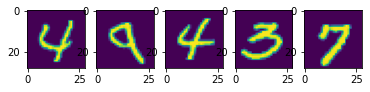

In [ ]:
# sample images
for i in range (1,6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[random.randint(0,5000)])

In [ ]:
x_train = x_train.reshape( (x_train.shape[0] , x_train.shape[1] , x_train.shape[2] , 1) )
x_test = x_test.reshape( (x_test.shape[0] , x_test.shape[1] , x_test.shape[2] , 1) )
x_train =  x_train.astype('float32') / 255.0
x_test =  x_test.astype('float32') / 255.0

In [9]:
model= Sequential()
model.add(Conv2D(32, (3,3) , activation='relu' , input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3) , activation='relu' ))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu' ))
model.add(Dense(10,activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, verbose =1 , batch_size=128, validation_split=0.1)

422/422 [==============================] - 41s 95ms/step - loss: 0.5143 - accuracy: 0.8397 - val_loss: 0.2156 - val_accuracy: 0.9437


In [12]:
loss,acc = model.evaluate(x_test,y_test,verbose=0)
print("accuracy = ",acc*100, "%")

accuracy =  92.79999732971191 %


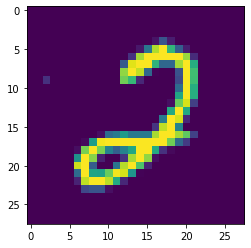

In [19]:
n = random.randint(0,5000)
test_img = x_train[n]
plt.imshow(tf.squeeze(test_img))
plt.show()

In [20]:
test_img = test_img.reshape(1,28,28,1 ) 

p = model.predict([test_img])
print("prediction = {} ".format(argmax(p)))

prediction = 2 
